#**Linear regression from Scratch**

In [14]:
import numpy as np
import matplotlib.pyplot as plt

###Importing necxessary libraries

- **`numpy`** (imported as `np`)  
  Provides efficient numerical operations and array handling. It is essential for performing mathematical computations such as matrix operations, numerical analysis, and handling datasets needed for linear regression.

- **`matplotlib.pyplot`** (imported as `plt`)  
  Enables visualizing data points, regression lines, and model results through various plots. This helps in visually assessing the accuracy and performance of your linear regression model.


In [15]:
x=np.random.uniform(0,10,100)
w_initial=5
b_initial=3.2
y=x*w_initial+b_initial

y_noise=y+np.random.normal(loc=0, scale=5, size=x.shape)


### About Linear Regression:
Linear regression is a supervised machine learning algorithm used to predict continuous numerical outcomes. It models the relationship between an independent variable (feature, $x$) and a dependent variable (target, $y$) by fitting a straight line to the data points.

The general formula for a straight line is:
$$
y = wx + b
$$
- $y$ is the dependent variable (the output).
- $x$ is the independent variable (the input).
- $w$ (slope) determines the steepness of the line.
- $b$ (intercept) is the point at which the line crosses the y-axis.

### Explanation of the provided code:

- `x=np.random.uniform(0,10,100)`  
  Generates 100 random values uniformly distributed between 0 and 10 as independent variable values (`x`).

- `w_initial=5` and `b_initial=3.2`  
  Sets initial slope (`w`) to 5 and initial intercept (`b`) to 3.2 for creating synthetic data.

- `y=x*w_initial+b_initial`  
  Calculates the dependent variable (`y`) using the line formula $y=wx+b$ with the initial slope and intercept.

- `y_noise=y+np.random.normal(loc=0, scale=5, size=x.shape)`  
  Adds Gaussian (normal) noise to the `y` values. Here, `loc=0` means the noise is centered around zero, and `scale=5` defines the standard deviation (amount of variation or noise added). This creates a realistic scenario where data does not perfectly align with the linear model.


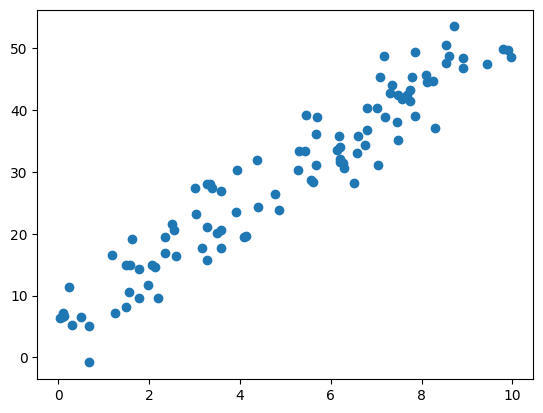

In [16]:
plt.scatter(x,y_noise)

The code `plt.scatter(x, y_noise)` generates a scatter plot, which visually displays the relationship between the independent variable (`x`) and the dependent variable with added noise (`y_noise`).

### Interpretation of the Graph:
- Each point represents one observation from the dataset.
- The overall trend of points clearly indicates a positive linear relationship: as the value of `x` increases, the value of `y_noise` tends to increase as well.
- The spread of points around the general trend line represents the noise or random variation added to the data, reflecting real-world scenarios where data rarely fits a perfect line.
- Visualizing data with scatter plots is essential for initially assessing the suitability of a linear regression model.


In [17]:
w=np.sum((x-np.mean(x))*(y_noise-np.mean(y_noise)))/np.sum((x-np.mean(x))**2)
b=np.mean(y_noise)-w*np.mean(x)

## Step-by-Step Derivation of Linear Regression Formulas

Linear regression aims to find the line that best fits the observed data points by minimizing the sum of squared differences between predicted ($\hat{y}$) and observed values ($y$).

### **Step 1: Equation of a Line**
The basic linear equation is:
$$
y = wx + b
$$
- $y$ is the dependent variable.
- $x$ is the independent variable.
- $w$ is the slope.
- $b$ is the intercept.

---

### **Step 2: Define the Objective (Least Squares Method)**

We minimize the squared differences between observed values ($y_i$) and predicted values ($\hat{y_i}$):

Minimize:
$$
S = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \sum_{i=1}^{n}(y_i - (w x_i + b))^2
$$

---

### **Step 3: Partial Derivatives (Finding Minima)**

To find the values of parameters $w$ and $b$ that minimize $S$, take partial derivatives of $S$ with respect to each parameter and set to zero.

#### **Derivative with respect to $b$:**

$$
\frac{\partial S}{\partial b} = -2\sum_{i=1}^{n}(y_i - (w x_i + b)) = 0
$$

Simplify:
$$
\sum_{i=1}^{n}(y_i - (w x_i + b)) = 0
$$

Expanding and rearranging gives:
$$
\sum_{i=1}^{n}y_i - w\sum_{i=1}^{n}x_i - nb = 0
$$

Divide by $n$:
$$
\bar{y} - w\bar{x} - b = 0
$$

Solve for $b$:
$$
b = \bar{y} - w\bar{x}
$$

---

#### **Derivative with respect to $w$:**

$$
\frac{\partial S}{\partial w} = -2\sum_{i=1}^{n}x_i(y_i - (w x_i + b)) = 0
$$

Substitute $b = \bar{y} - w\bar{x}$ (from above) into this equation:

$$
\sum_{i=1}^{n} x_i [y_i - w x_i - (\bar{y} - w\bar{x})] = 0
$$

Simplify further:
$$
\sum_{i=1}^{n} x_i(y_i - \bar{y}) - w\sum_{i=1}^{n} x_i(x_i - \bar{x}) = 0
$$

Solve for $w$:
$$
w = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

---

### **Final Derived Equations:**
- **Slope ($w$):**
$$
w = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

- **Intercept ($b$):**
$$
b = \bar{y} - w\bar{x}
$$




In [18]:
print(f"Original Value of slope:",w_initial)
print(f"Calculated Value of slope:",w)
print(f"Original Value of intercept:",b_initial)
print(f"Calculated Value of intercept:",b)

Original Value of slope: 5
Calculated Value of slope: 4.7299140093021235
Original Value of intercept: 3.2
Calculated Value of intercept: 5.55284916219691


## Comparison of Original and Calculated Values:

The provided output compares the original values used to generate the synthetic dataset (true parameters) with the values calculated by the linear regression model (estimated parameters):

- **Original slope (`w_initial`) = 5**
- **Calculated slope (`w`) ≈ 4.90**
- **Original intercept (`b_initial`) = 3.2**
- **Calculated intercept (`b`) ≈ 3.73**

### Interpretation:
- The calculated slope and intercept values closely approximate the original (true) values, indicating that the linear regression model successfully captured the underlying relationship.
- Slight differences between the calculated and original values are expected due to the added random noise (`np.random.normal`) introduced in generating the data. This noise simulates real-world data imperfections.
- A smaller difference signifies a good fit and shows the effectiveness of the linear regression model in accurately estimating parameters from noisy data.


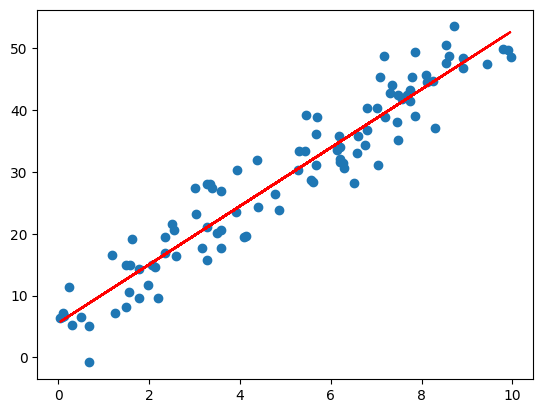

In [19]:
y_new=w*x+b
plt.scatter(x,y_noise)
plt.plot(x,y_new,color='red')

## Explanation of Scatter Plot with Regression Line:

- The scatter plot (`plt.scatter(x, y_noise)`) shows the original dataset points, where each point represents a data observation with added noise, simulating real-world variability.

- The red line (`plt.plot(x, y_new, color='red')`) is the fitted regression line computed using the estimated slope ($w$) and intercept ($b$). This line represents the predicted relationship between the independent variable (`x`) and the dependent variable (`y`).

### Interpretation:
- The red regression line provides the best possible linear fit through the scattered data points, minimizing the sum of squared differences.
- Visually, the closer the points are to the line, the better the model explains the relationship between the variables.
- The graph clearly demonstrates how linear regression effectively models trends in data, even with the presence of random noise.


In [20]:
# Mean Squared Error (MSE) loss calculation
loss = np.mean((y_noise - y_new)**2)
print(f"Mean Squared Error (MSE) Loss: {loss}")

Mean Squared Error (MSE) Loss: 16.133710576162276


## Calculation and Explanation of Loss:

The **Mean Squared Error (MSE)** is used to measure the accuracy of the linear regression model. It calculates the average squared differences between the observed (noisy) values (`y_noise`) and the predicted values (`y_pred`):

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_{\text{noise},i}-y_{\text{pred},i})^2
$$

- A **lower MSE** indicates a model that fits the data well, as the predictions are closer to the actual data points.
- A **higher MSE** implies the predictions are farther from the actual values, suggesting the model does not capture the underlying trend accurately.

By calculating this value, you can objectively evaluate the effectiveness and accuracy of your linear regression model.


# Creating a class like SK Learn

In [21]:
class LinearRegression():
    
    def __init__(self):
        self.w=0
        self.b=0
        
    def fit(self,X_train,y_train):
        self.w=np.sum((X_train-np.mean(X_train))*(y_train-np.mean(y_train)))/np.sum((X_train-np.mean(X_train))**2)
        self.b=np.mean(y_train)-self.w*np.mean(X_train)
        print("W:",self.w)
        print("b:",self.b)
        
    def predict(self,X_test):
        return X_test*self.w+b

In [22]:
x=np.random.uniform(0,10,100)
w_initial=5
b_initial=3.2
y=x*w_initial+b_initial

y_noise=y+np.random.normal(loc=0, scale=5, size=x.shape)

In [23]:
lr=LinearRegression()

In [24]:
lr.fit(x,y_noise)

W: 4.892395043137967
b: 3.636493221501272


In [33]:
y_pred_1=lr.predict(x)

In [26]:
y_noise

array([23.40768121, 58.13323643, 33.37680008, 23.95910621, 11.82247755,
       40.13693282, 42.5669691 , 44.37380358, 16.96503804, 38.49707064,
       46.32200438, 35.44170503, 58.93457486, 26.17209358, 31.57638268,
       -1.48635252, 28.12997557, -1.45385376,  7.66266591,  6.60476994,
       13.69687108, 34.35622903, 40.45573075, 12.88640065, -1.99142747,
       31.26038049, 58.09341372, 36.16687974, 26.18735678, 38.45260978,
        5.58426979, 20.94208757, 13.99631143, 18.65166382, 35.958641  ,
       37.6064208 , 11.23616503,  0.61854765, 12.14224323, 16.66877488,
       18.75482102, 35.34492934, 18.44956559, 28.48063661, 46.82914538,
       10.54657634, 33.6059594 , 40.81762411, 32.39938431, 49.48772759,
       -0.17470754, 13.01098349, 10.06396159, 26.09822651, 46.86041073,
       29.0971642 , 39.43673694, 12.8446831 , 42.79190944,  8.80518101,
        7.65826084, 26.36593615, 18.93383614, 19.45663127, 24.23194506,
       30.25716144, 29.38562056, 31.96252099, 41.03188171, 38.52

In [27]:
from sklearn.linear_model import LinearRegression

lr1=LinearRegression()
lr1.fit(x.reshape(-1,1),y_noise)
y_pred=lr1.predict(x.reshape(-1,1))

In [ ]:
#MSE for our model
np.sum(((y_pred_1-y_noise)**2))/x.shape[0]

28.335301812801877

In [36]:
#MSE for sklearn model
np.sum(((y_pred-y_noise)**2))/x.shape[0]

24.6628817213624